In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('filtered_ShubmanGill.csv')

In [3]:
df

,Unnamed: 0,inns_number,bat,team,bowl,opposition,ball,ball_id,outs,dismissal,...,control,inns,1s,2s,3s,4s,5s,6s,bowler_dismissed?,dots
0,772,1.0,Shubman Gill,Kolkata Knight Riders,Billy Stanlake,Sunrisers Hyderabad,5.0,13.05,0,NaN,...,1.0,1,0,0,0,0,0,0,0,1
1,166,1.0,Shubman Gill,Kolkata Knight Riders,Rashid Khan,Sunrisers Hyderabad,4.0,15.04,0,NaN,...,1.0,1,0,0,0,0,0,0,0,1
2,165,1.0,Shubman Gill,Kolkata Knight Riders,Rashid Khan,Sunrisers Hyderabad,2.0,15.02,0,NaN,...,1.0,1,1,0,0,0,0,0,0,0
3,514,1.0,Shubman Gill,Kolkata Knight Riders,Siddarth Kaul,Sunrisers Hyderabad,5.0,14.05,0,NaN,...,1.0,1,1,0,0,0,0,0,0,0
4,167,1.0,Shubman Gill,Kolkata Knight Riders,Rashid Khan,Sunrisers Hyderabad,5.0,15.05,0,NaN,...,1.0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,2402,1.0,Shubman Gill,Gujarat Titans,Shardul Thakur,Chennai Super Kings,2.0,15.02,0,NaN,...,0.0,1,0,0,0,0,0,0,0,1
2430,2403,1.0,Shubman Gill,Gujarat Titans,Shardul Thakur,Chennai Super Kings,3.0,15.03,0,NaN,...,1.0,1,0,1,0,0,0,0,0,0
2431,2404,1.0,Shubman Gill,Gujarat Titans,Shardul Thakur,Chennai Super Kings,4.0,15.04,0,NaN,...,1.0,1,1,0,0,0,0,0,0,0
2432,2391,1.0,Shubman Gill,Gujarat Titans,Tushar Deshpande,Chennai Super Kings,1.0,14.01,0,NaN,...,1.0,1,1,0,0,0,0,0,0,0


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
df.columns

Index(['inns_number', 'bat', 'team', 'bowl', 'opposition', 'ball', 'ball_id',
       'outs', 'dismissal', 'over', 'phase', 'noball', 'wide', 'date', 'year',
       'ground', 'country', 'bat_hand', 'bowl_style', 'bowl_kind',
       'bowl_category', 'runs', 'balls', 'line', 'length', 'shot', 'control',
       'inns', '1s', '2s', '3s', '4s', '5s', '6s', 'bowler_dismissed?',
       'dots'],
      dtype='object')

In [7]:
df=df.sort_values(by=['date','inns_number','ball_id'])

In [8]:
ballscalc=df.groupby(['bat', 'date', 'team', 'opposition', 'inns_number']).sum().reset_index()

C:\Users\Vijay\AppData\Local\Temp\ipykernel_22396\3627821378.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ballscalc=df.groupby(['bat', 'date', 'team', 'opposition', 'inns_number']).sum().reset_index()


In [9]:
mean_balls=ballscalc['balls'].mean()
median_balls=ballscalc['balls'].median()

In [10]:
mean_balls=int(round(mean_balls,0))

In [11]:
median_balls

20.0

In [12]:
cumulative_df = df.groupby(['bat', 'date', 'team', 'opposition', 'inns_number']).transform('cumsum')
result = pd.concat([df[['bat', 'date', 'team', 'opposition', 'inns_number']], cumulative_df], axis=1)

C:\Users\Vijay\AppData\Local\Temp\ipykernel_22396\356958935.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cumulative_df = df.groupby(['bat', 'date', 'team', 'opposition', 'inns_number']).transform('cumsum')


In [13]:
result.to_csv('Shubman-cumulative-by-match.csv')

In [14]:
result.columns

Index(['bat', 'date', 'team', 'opposition', 'inns_number', 'ball', 'ball_id',
       'outs', 'over', 'noball', 'wide', 'year', 'runs', 'balls', 'control',
       'inns', '1s', '2s', '3s', '4s', '5s', '6s', 'bowler_dismissed?',
       'dots'],
      dtype='object')

In [15]:
reqcols=['bat','date','team','opposition','inns_number','outs','runs','balls','control','1s','2s','3s','4s','5s','6s','bowler_dismissed?','dots']
result=result[reqcols]

In [16]:
result
result['SR']=round(result['runs']*100/result['balls'],2)

In [17]:
cum_dataset=result[['bat','date','team','opposition','inns_number','runs','balls','SR']]

In [18]:
cum_dataset

,bat,date,team,opposition,inns_number,runs,balls,SR
0,Shubman Gill,2018-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,1.0,0.0,1.0,0.00
6,Shubman Gill,2018-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,1.0,0.0,2.0,0.00
3,Shubman Gill,2018-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,1.0,1.0,3.0,33.33
2,Shubman Gill,2018-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,1.0,2.0,4.0,50.00
1,Shubman Gill,2018-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,1.0,2.0,5.0,40.00
...,...,...,...,...,...,...,...,...
2382,Shubman Gill,2024-05-10,Gujarat Titans,Chennai Super Kings,1.0,101.0,51.0,198.04
2383,Shubman Gill,2024-05-10,Gujarat Titans,Chennai Super Kings,1.0,102.0,52.0,196.15
2424,Shubman Gill,2024-05-10,Gujarat Titans,Chennai Super Kings,1.0,103.0,53.0,194.34
2425,Shubman Gill,2024-05-10,Gujarat Titans,Chennai Super Kings,1.0,104.0,54.0,192.59


In [19]:
pivot_df = cum_dataset.pivot_table(index='date', columns='balls', values='SR', aggfunc='first')

In [20]:
pivot_df

balls,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0
date,,,,,,,,,,,,,,,,,,,,,
2018-04-14,0.0,0.0,33.33,50.0,40.0,50.00,42.86,37.5,33.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-16,400.0,250.0,200.00,150.0,120.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-21,400.0,200.0,200.00,250.0,220.0,200.00,185.71,175.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-27,0.0,0.0,0.00,100.0,100.0,100.00,100.00,87.5,88.89,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-29,100.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-21,0.0,0.0,33.33,25.0,40.0,50.00,42.86,87.5,122.22,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-24,100.0,100.0,200.00,150.0,120.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-28,0.0,50.0,33.33,125.0,140.0,116.67,114.29,112.5,100.00,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
mean_vals=pivot_df.mean(numeric_only=True)

In [22]:
average_SR=pd.DataFrame(mean_vals)

In [23]:
average_SR=average_SR.rename(columns={0:'Mean_SR'})

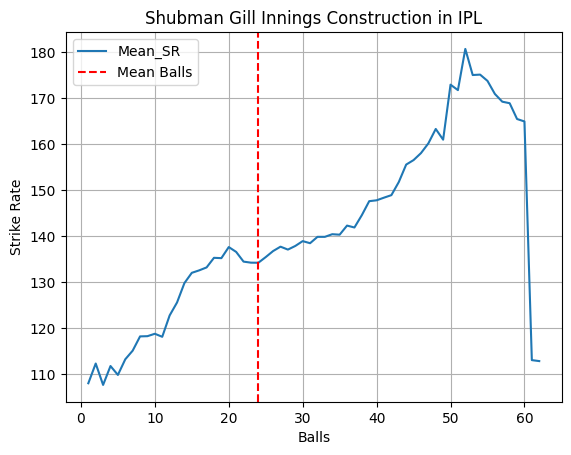

In [24]:
import matplotlib.pyplot as plt
average_SR.plot(kind='line')
plt.xlabel('Balls')
plt.ylabel('Strike Rate')
plt.title('Shubman Gill Innings Construction in IPL')
plt.axvline(x=mean_balls, color='red', linestyle='--', label='Mean Balls')
plt.grid()
plt.legend()
plt.show()

In [25]:
mean_balls

24

In [26]:
average_SR.to_csv('transformed/strikerateoverballs.csv')